Epoch 1/50
5/5 [==============================] - 2s 150ms/step - loss: 0.6924 - val_loss: 0.6904
Epoch 2/50
5/5 [==============================] - 0s 88ms/step - loss: 0.6892 - val_loss: 0.6854
Epoch 3/50
5/5 [==============================] - 0s 92ms/step - loss: 0.6827 - val_loss: 0.6739
Epoch 4/50
5/5 [==============================] - 1s 95ms/step - loss: 0.6679 - val_loss: 0.6508
Epoch 5/50
5/5 [==============================] - 1s 104ms/step - loss: 0.6402 - val_loss: 0.6119
Epoch 6/50
5/5 [==============================] - 1s 126ms/step - loss: 0.5960 - val_loss: 0.5557
Epoch 7/50
5/5 [==============================] - 1s 143ms/step - loss: 0.5344 - val_loss: 0.4837
Epoch 8/50
5/5 [==============================] - 1s 154ms/step - loss: 0.4583 - val_loss: 0.4009
Epoch 9/50
5/5 [==============================] - 1s 137ms/step - loss: 0.3739 - val_loss: 0.3158
Epoch 10/50
5/5 [==============================] - 1s 115ms/step - loss: 0.2901 - val_loss: 0.2377
Epoch 11/50
5/5 [=====

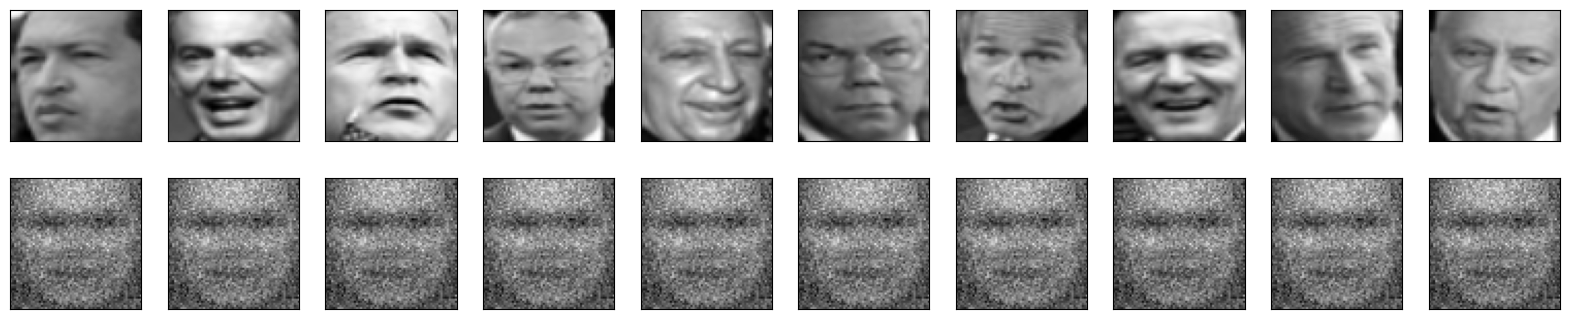

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.datasets import fetch_lfw_people
from skimage.transform import resize

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Normalize pixel values to be between 0 and 1
X = lfw_people.images.astype('float32') / 255.0

# Resize images to 64x64
X_resized = np.array([resize(img, (64, 64), anti_aliasing=True) for img in X])

# Flatten the images for the autoencoder
X_flattened = X_resized.reshape((len(X_resized), np.prod(X_resized.shape[1:])))

# Define the autoencoder model
encoding_dim = 128  # Size of the encoded representations
input_img = Input(shape=(X_flattened.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(X_flattened.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(X_flattened, X_flattened, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

# Create a separate encoder model
encoder = Model(input_img, encoded)

# Encode the images
encoded_imgs = encoder.predict(X_flattened)

# Decode the encoded images
decoded_imgs = autoencoder.predict(X_flattened)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_flattened[i].reshape(64, 64), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
